In [2858]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [2859]:
# Load test data
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2860]:
# Load train data
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2861]:
# Looking into the info of the train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

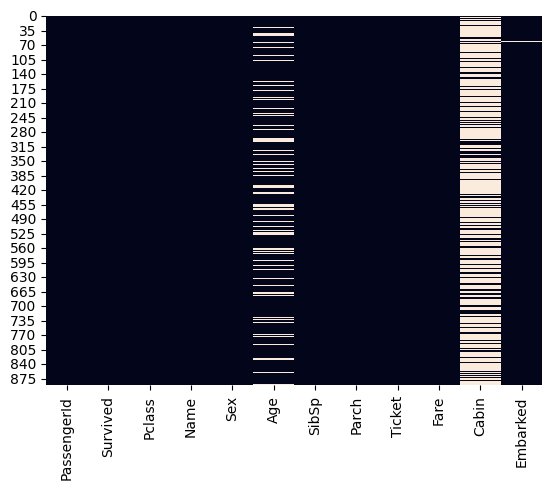

In [2862]:
# Visualise missing vvalues of the train dataset
sns.heatmap(train_data.isnull(), cbar=False)

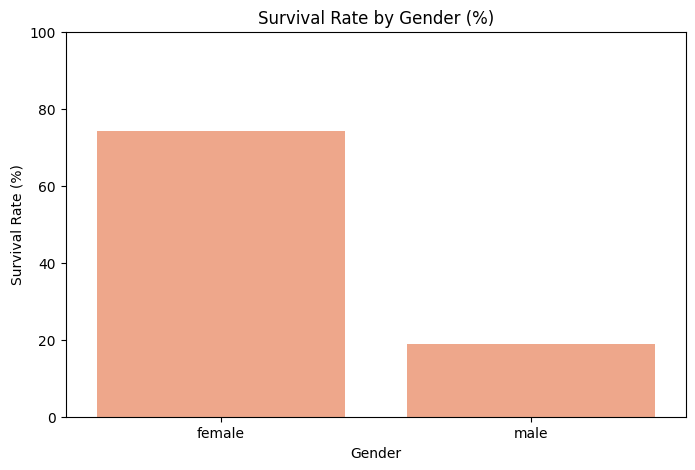

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [2863]:
# Bar chart showing survival rate by gender

# Convert survival rate to percentage
survival_by_gender_percentage = train_data.groupby("Sex")["Survived"].mean() * 100

# Plot the survival rates in percentage
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_by_gender_percentage.index, y=survival_by_gender_percentage.values, color= '#FFA07A')
plt.xlabel("Gender")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Gender (%)")
plt.ylim(0, 100)
plt.show()

# Display the survival rates numerically in percentage
survival_by_gender_percentage

In [2864]:
# Change data type of Sex to int (0=male, 1=female) in the train dataset
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1}).astype('int64')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [2865]:
# Change data type of Sex to int (0=male, 1=female) in the test dataset
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1}).astype('int64')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [2866]:
# Looking into the info of the train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [2867]:
# Looking into the info of the test dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [2868]:
# checking for missing data in the train dataset
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [2869]:
# checking for missing data in the test dataset
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [2870]:
# View some statistical details in the train dataset
train_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [2871]:
# View some statistical details in the test dataset
test_data.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


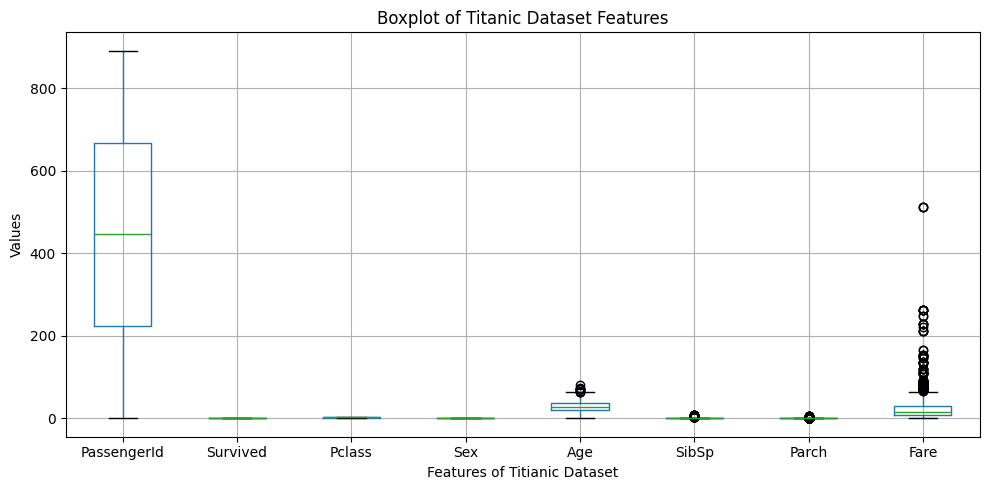

In [2872]:
# Boxplot of the train dataset to spot outliers

train_data.boxplot(figsize=(10,5))

# Add title and labels
plt.title('Boxplot of Titanic Dataset Features')
plt.xlabel('Features of Titianic Dataset')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

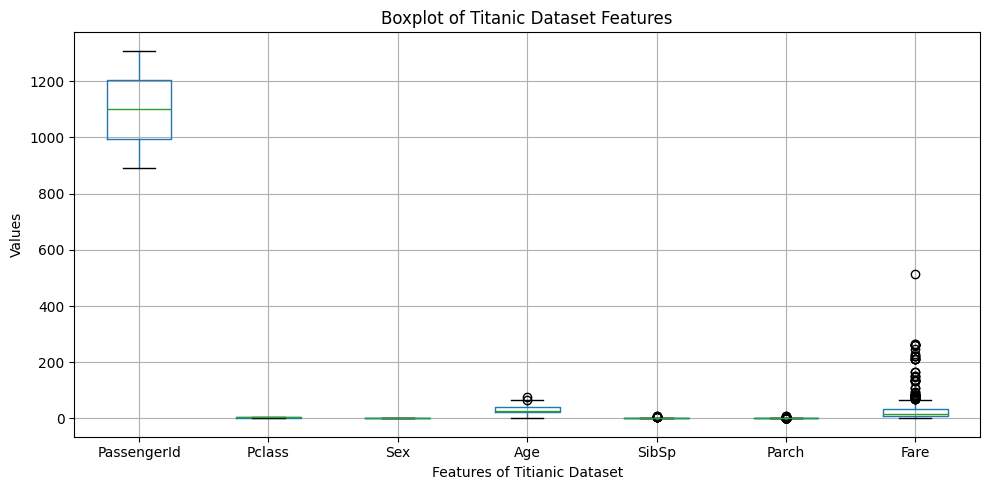

In [2873]:
# Boxplot of the test dataset to spot outliers

test_data.boxplot(figsize=(10,5))

# Add title and labels
plt.title('Boxplot of Titanic Dataset Features')
plt.xlabel('Features of Titianic Dataset')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

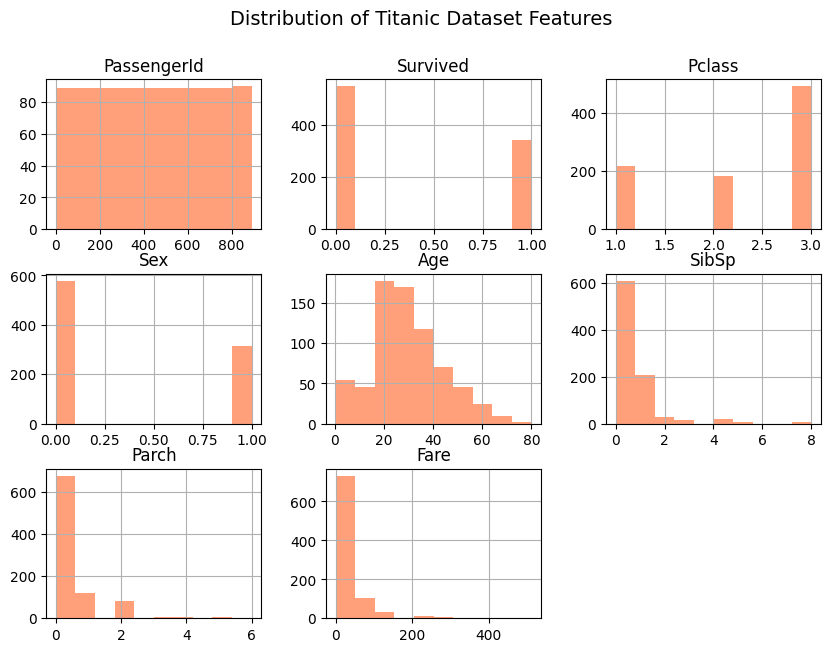

In [2874]:
# Histogram of the train dataset
train_data.hist(bins=10, color='#FFA07A', figsize=(10,7))

# Add title
plt.suptitle('Distribution of Titanic Dataset Features', fontsize=14)

plt.show()

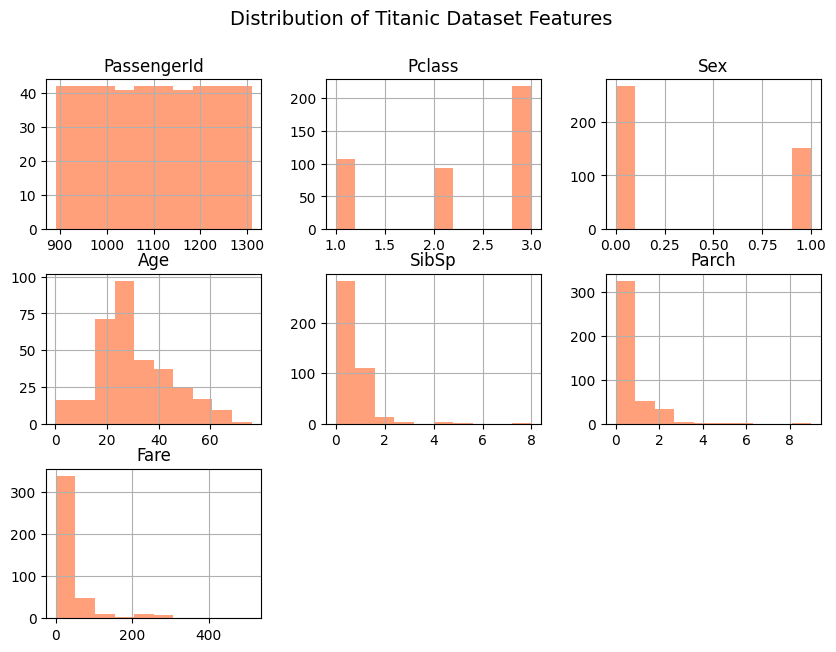

In [2875]:
#histogram of the test dataset
test_data.hist(bins=10, color='#FFA07A', figsize=(10,7))

# Add title
plt.suptitle('Distribution of Titanic Dataset Features', fontsize=14)

plt.show()

In [2876]:
# Checking for missing data in the train dataset
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [2877]:
# Create a new dataframe

df_age_null_dropped = train_data.dropna(subset=['Age'])
df_age_null_dropped.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [2878]:
# Checking for missing data in the train dataset with rows with age missing values dropped
df_age_null_dropped.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

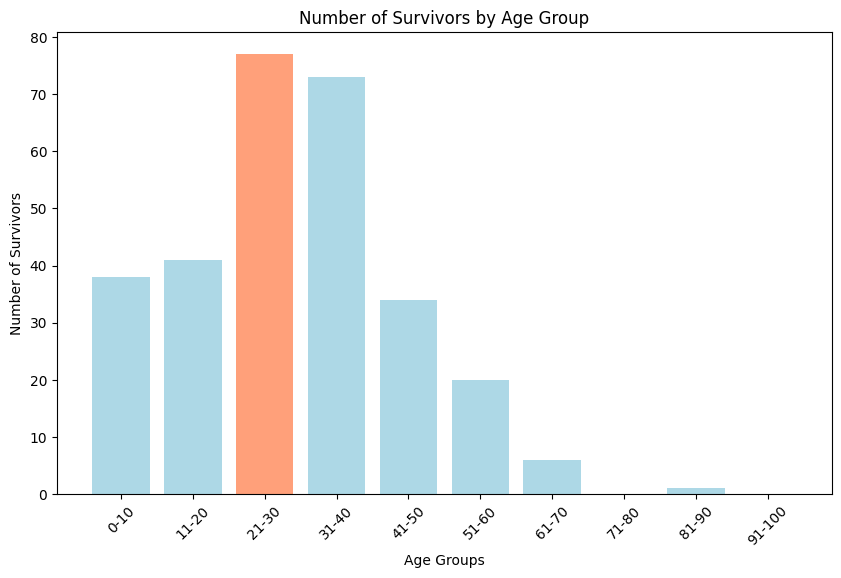

In [2879]:
# Bar chart showing number of Survivors in each age group
# Define age bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column for Age Groups safely
df_age_null_dropped = df_age_null_dropped.copy()  # Ensure it's a copy
df_age_null_dropped.loc[:, 'AgeGroup'] = pd.cut(df_age_null_dropped['Age'], bins=bins, labels=labels, right=False)

# Count the number of survivors in each age group
survivor_count = df_age_null_dropped[df_age_null_dropped['Survived'] == 1].groupby('AgeGroup', observed=False)['Survived'].count()


# Plot the survivor count
plt.figure(figsize=(10, 6))
plt.bar(survivor_count.index, survivor_count.values, color=['lightblue', 'lightblue', '#FFA07A', 'lightblue', 'lightblue', 'lightblue', 'lightblue', '#FFA07A'])
plt.xlabel('Age Groups')
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors by Age Group')
plt.xticks(rotation=45)
plt.show()

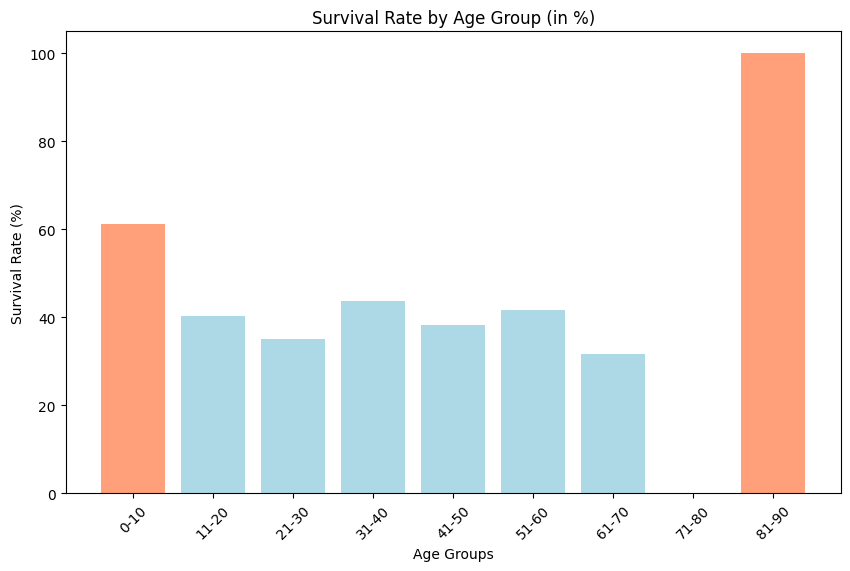

In [2880]:
# Define age bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column for Age Groups using .loc to avoid SettingWithCopyWarning
df_age_null_dropped.loc[:, 'AgeGroup'] = pd.cut(df_age_null_dropped['Age'], bins=bins, labels=labels, right=False)

# Calculate survival rate for each age group and convert to percentage
survival_rate = df_age_null_dropped.groupby('AgeGroup', observed=False)['Survived'].mean() * 100

# Plot the survival rate
plt.figure(figsize=(10, 6))
plt.bar(survival_rate.index, survival_rate.values, color=['#FFA07A', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', '#FFA07A'])
plt.xlabel('Age Groups')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Age Group (in %)')
plt.xticks(rotation=45)
plt.show()

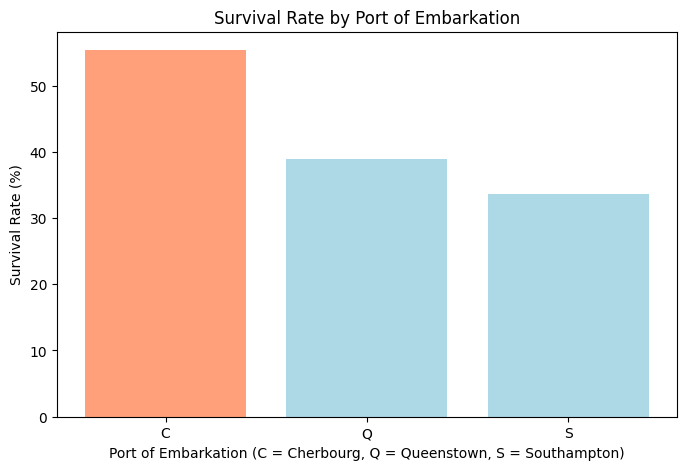

In [2881]:
# Create a new dataframe
df_embarked_null_dropped = train_data.dropna(subset=['Embarked'])

# Calculate survival rate in percentage
embarked_survival_pct = df_embarked_null_dropped.groupby('Embarked')['Survived'].mean() * 100

# Plotting the bar graph with percentage
plt.figure(figsize=(8, 5))
plt.bar(embarked_survival_pct.index, embarked_survival_pct.values, color=['#FFA07A', 'lightblue', 'lightblue'])
plt.xlabel('Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Port of Embarkation')
plt.show()


In [2882]:
# Filling train data - age with median(skewed)
# Filling train data - Embarked with mode
# Fillna function

train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [2883]:
# checking for missing data in the train dataset
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [2884]:
# Filling test data - age with median
# Filling test data - fare with median

test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [2885]:
# checking for missing data in the test dataset
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [2886]:
train_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [2887]:
#counting the number of survived(1) and deceased(0) from the train dataset
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

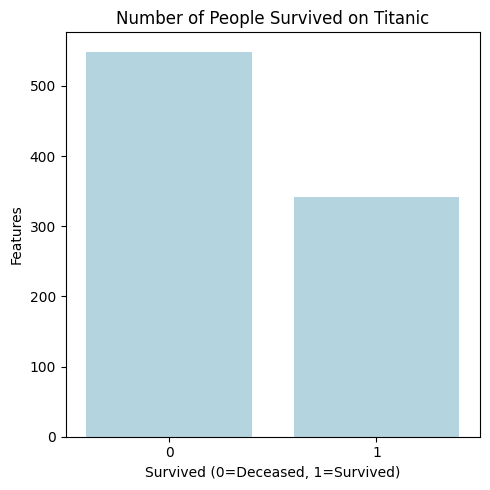

In [2888]:
# plot a chart
plt.figure(figsize=(5,5))
sns.countplot(x = 'Survived', color='lightblue', data = train_data)

# Add title and labels
plt.title('Number of People Survived on Titanic')
plt.xlabel('Survived (0=Deceased, 1=Survived)')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

In [2889]:
# Feature Engineering
# Create FamilySize, IsAlone, Title columns
# IsAlone 0=not_alone, 1=alone

train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,1


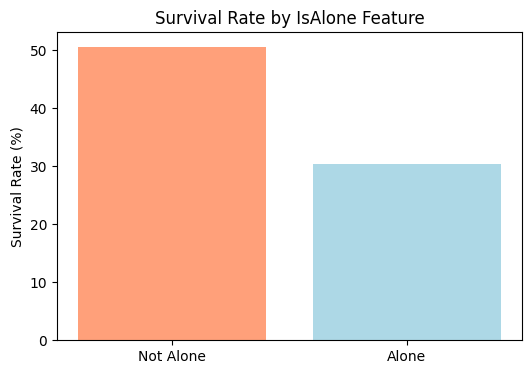

   IsAlone  Survival Rate (%)
0        0          50.564972
1        1          30.353818


In [2890]:
# Bar chart showing survival rate of IsAlone
# Calculate survival rate as percentage
survival_rate = train_data.groupby('IsAlone')['Survived'].mean() * 100
survival_rate = survival_rate.reset_index()
survival_rate.columns = ['IsAlone', 'Survival Rate (%)']

# Plot survival rates
plt.figure(figsize=(6, 4))
plt.bar(survival_rate['IsAlone'], survival_rate['Survival Rate (%)'], color=['#FFA07A', 'lightblue'])
plt.xticks([0, 1], ['Not Alone', 'Alone'])
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by IsAlone Feature')
plt.show()

print(survival_rate)


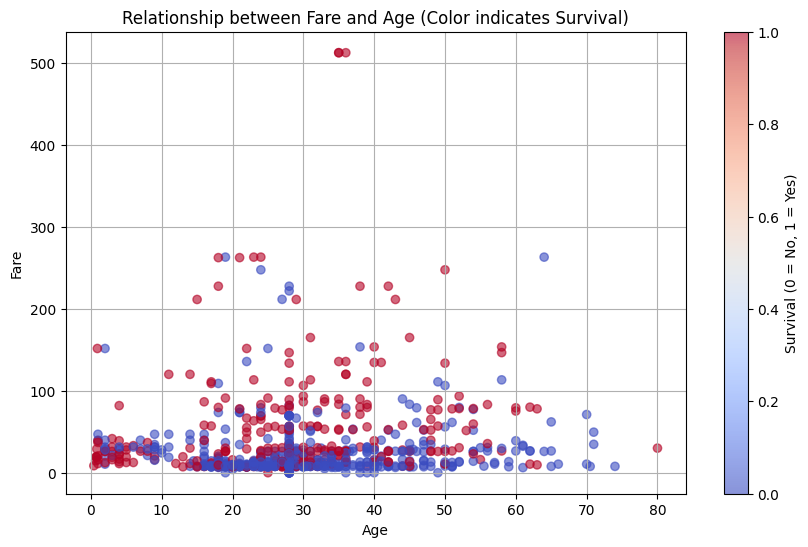

In [2891]:
# Scatter plot to explore the relationship between Fare and Age
plt.figure(figsize=(10, 6))
plt.scatter(train_data['Age'], train_data['Fare'], alpha=0.6, c=train_data['Survived'], cmap='coolwarm')
plt.title('Relationship between Fare and Age (Color indicates Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar(label='Survival (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()

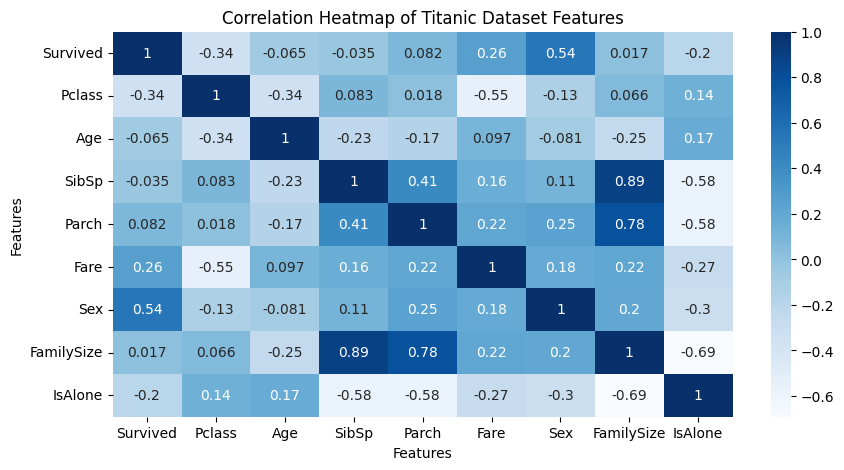

In [2892]:
# Correlation mat
train_data_corr = train_data.loc[:, ['Survived','Pclass','Age','SibSp', 'Parch', 'Fare', 'Sex', 'FamilySize', 'IsAlone']]

plt.figure(figsize=(10,5))
corr_mat = train_data_corr.corr()
sns.heatmap(corr_mat, cmap='Blues', annot=True)

# Add title and labels
plt.title('Correlation Heatmap of Titanic Dataset Features')
plt.xlabel('Features')
plt.ylabel('Features')

plt.tight_layout
plt.show()

In [2893]:
# independent and dependent variable
features = ['Pclass', 'Sex', 'Age', 'Fare']

X = train_data[features].values
y = train_data['Survived'].values

In [2894]:
X

array([[ 3.    ,  0.    , 22.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    , 71.2833],
       [ 3.    ,  1.    , 26.    ,  7.925 ],
       ...,
       [ 3.    ,  1.    , 28.    , 23.45  ],
       [ 1.    ,  0.    , 26.    , 30.    ],
       [ 3.    ,  0.    , 32.    ,  7.75  ]])

In [2895]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [2896]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [2897]:
X_train

array([[  1.    ,   0.    ,  45.5   ,  28.5   ],
       [  2.    ,   0.    ,  23.    ,  13.    ],
       [  3.    ,   0.    ,  32.    ,   7.925 ],
       ...,
       [  3.    ,   0.    ,  41.    ,  14.1083],
       [  1.    ,   1.    ,  14.    , 120.    ],
       [  1.    ,   0.    ,  21.    ,  77.2875]])

In [2898]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [2899]:
X_train

array([[-1.61413602, -0.7243102 ,  1.25364106, -0.07868358],
       [-0.40055118, -0.7243102 , -0.47728355, -0.37714494],
       [ 0.81303367, -0.7243102 ,  0.21508629, -0.47486697],
       ...,
       [ 0.81303367, -0.7243102 ,  0.90745614, -0.35580399],
       [-1.61413602,  1.38062393, -1.1696534 ,  1.68320121],
       [-1.61413602, -0.7243102 , -0.63114352,  0.86074761]])

# Logistic Regression 

In [2900]:
# Logisitic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

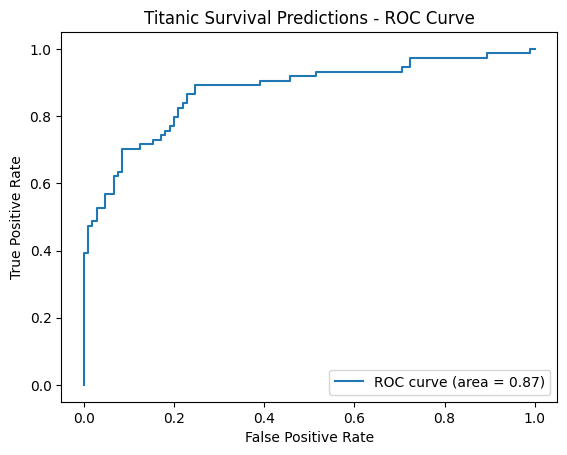

In [2901]:
# Reciever Operating Characteristic Curve 

y_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic Survival Predictions - ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [2902]:
# Predict on the test data
y_pred_log = log_reg.predict(X_test)
y_pred_log

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1])

In [2903]:
# Putting in a dataframe
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_log})
comparison_df

,Actual,Predicted
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
174,0,0
175,0,0
176,1,1
177,1,1


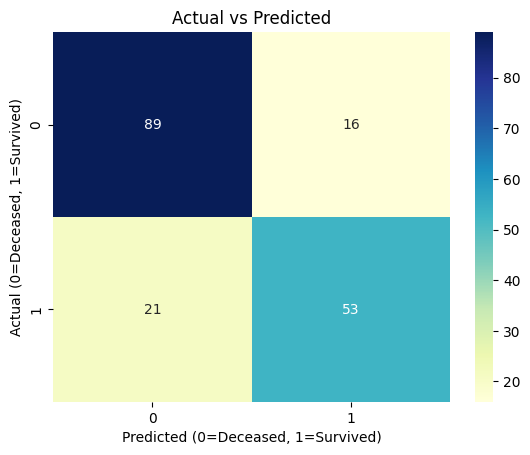

In [2904]:
# Heatmap of actual vs. predicted Comparison
sns.heatmap(pd.crosstab(comparison_df['Actual'], comparison_df['Predicted']), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Actual vs Predicted')
plt.xlabel('Predicted (0=Deceased, 1=Survived)')
plt.ylabel('Actual (0=Deceased, 1=Survived)')
plt.show()

In [2905]:
accuracy_score(y_test, y_pred_log)

0.7932960893854749

In [2906]:
# confusion matrix
confusion_matrix(y_test, y_pred_log)

array([[89, 16],
       [21, 53]])

In [2907]:
# model evaluation 
# r2, mean absolute error, mean square error, root mean square error
# 0, 1
# mae must have a lower mae 0. 
# mse --o.
# rmse 0. 
r2 = metrics.r2_score(y_test, y_pred_log)
meanABerr = metrics.mean_absolute_error(y_test, y_pred_log)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_log)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_log))
print('R2:',r2)
print('Mean Absolute Error:',meanABerr)
print('Mean Square Error:',meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)

R2: 0.14761904761904754
Mean Absolute Error: 0.20670391061452514
Mean Square Error: 0.20670391061452514
Root Mean Square Error: 0.454647017602145


# KNN

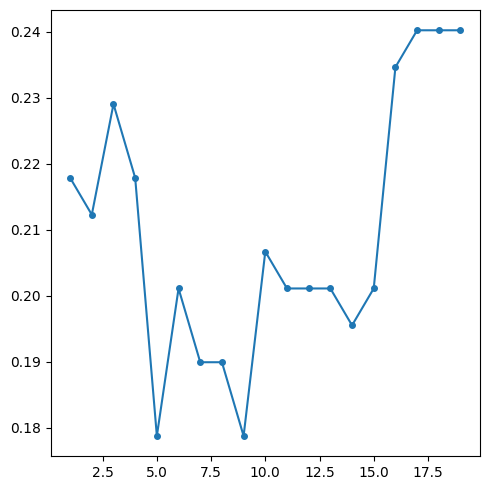

In [2908]:
# Getting our k value
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    error_rate.append(np.mean(knn_pred != y_test))

plt.figure(figsize=(5,5))
plt.plot(range(1, 20), error_rate, marker = 'o', markersize = 4)
plt.tight_layout()

In [2909]:
# Building my knn model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [2910]:
# Make prediction
y_pred_knn = knn.predict(X_test)

In [2911]:
# Measure accuracy
metrics.accuracy_score(y_test, y_pred_knn) 

0.770949720670391

# Decision Trees

In [2912]:
# Creating a decision tree classifier
# gini
decision_tree_gini = DecisionTreeClassifier()

# Using entropy criterion
decision_tree_ent = DecisionTreeClassifier(criterion='entropy')

# Use a max depth
decision_tree_depth = DecisionTreeClassifier(max_depth=3)

In [2913]:
# Fit the trees
decision_tree_gini.fit(X_train, y_train)
# Fitting entropy
decision_tree_ent.fit(X_train, y_train)
# Max depth
decision_tree_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [2914]:
# Make prediction
y_pred_gini = decision_tree_gini.predict(X_test)
y_pred_ent = decision_tree_ent.predict(X_test)
y_pred_depth = decision_tree_depth.predict(X_test)

In [2915]:
# measure the accuracy
print("Accuracy (gini)", metrics.accuracy_score(y_test, y_pred_gini))
print("Accuracy (entropy)", metrics.accuracy_score(y_test, y_pred_ent))
print("Accuracy (max depth)", metrics.accuracy_score(y_test, y_pred_depth))

Accuracy (gini) 0.7430167597765364
Accuracy (entropy) 0.7597765363128491
Accuracy (max depth) 0.7988826815642458


# SVM

In [2916]:
# svm
clflinear = svm.SVC(kernel='linear')
clfsigmoid  = svm.SVC(kernel='sigmoid')
clfrbf = svm.SVC(kernel='rbf')

In [2917]:
# Train the models
clflinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

SVC()

In [2918]:
# Predict using the trained models
y_pred_lin = clflinear.predict(X_test)
y_pred_sig = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)

In [2919]:
# calculate the accuracy of the svm model
print("Accuracy for linear kernel:", metrics.accuracy_score(y_test, y_pred_lin))
print("Accuracy for sigmoid kernel:", metrics.accuracy_score(y_test, y_pred_sig))
print("Accuracy for rbf kernel:", metrics.accuracy_score(y_test, y_pred_rbf))

Accuracy for linear kernel: 0.7821229050279329
Accuracy for sigmoid kernel: 0.6703910614525139
Accuracy for rbf kernel: 0.8156424581005587


# NB

In [2920]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [2921]:
# make prediction
y_pred_gnb = clf.predict(X_test)
y_pred_gnb

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1])

In [2922]:
# put in a dataframe
pd.DataFrame({'Actual_food':y_test, 'Predicted_food': y_pred_gnb})

,Actual_food,Predicted_food
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
174,0,0
175,0,0
176,1,1
177,1,1


In [2923]:
# model evaluation
# accuracy score
metrics.accuracy_score(y_test, y_pred_gnb)

0.7597765363128491

# Compare accuracy score of each Classifier Model

In [2924]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": svm.SVC(),
    "Decision Trees (Max Depth)": DecisionTreeClassifier(max_depth=3),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, predictions)

# Display the accuracy scores
for model, score in accuracy_scores.items():
    print(f"{model}: {score:.4f}")

Logistic Regression: 0.7933
Support Vector Machine: 0.8156
Decision Trees (Max Depth): 0.7989
Naive Bayes: 0.7598


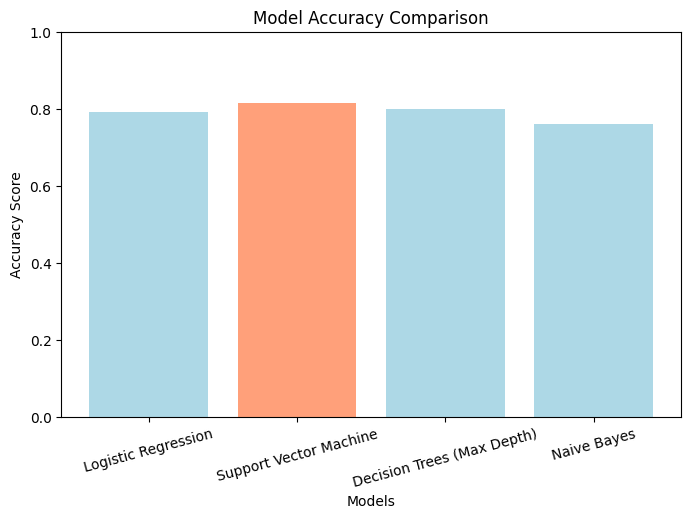

In [2925]:
# Plotting the accuracy scores
plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['#ADD8E6', '#FFA07A', '#ADD8E6', '#ADD8E6'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()